In [1]:
#importing libraries

import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt
import numpy as np
import copy as cp

In [2]:
dataDir='D:/MEU/Universidade/Codigo Tese/Dados/'
SegmentedData=pd.read_csv(dataDir+'SegmentedData.csv') #Ver Jupyter Notebook: "Segmenting Weighings" para
#encontrar o código que gerou o ficheiro 'SegmentedData.csv'
SegmentedData.drop(columns=['Unnamed: 0'],inplace=True)
SegmentedData['timestamp']= pd.to_datetime(SegmentedData['timestamp'])
SegmentedData['period']= pd.to_timedelta(SegmentedData['period'])
SegmentedData['diff']= pd.to_timedelta(SegmentedData['diff'])

In [3]:
#Creating a dataframe
d_df={'timestamp':[],'weight':[]}

In [4]:
for weighing in SegmentedData['weighing'][SegmentedData['weighing'].notnull()].unique():
    d_df['timestamp'].append(SegmentedData['timestamp'][SegmentedData['weighing']==weighing].iloc[0])
    d_df['weight'].append(SegmentedData['maximumWeight'][SegmentedData['weighing']==weighing].iloc[0])
weighingTimeSeries=pd.DataFrame(data=d_df)

C:\Users\Leonardo\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Todas as Pesagens')

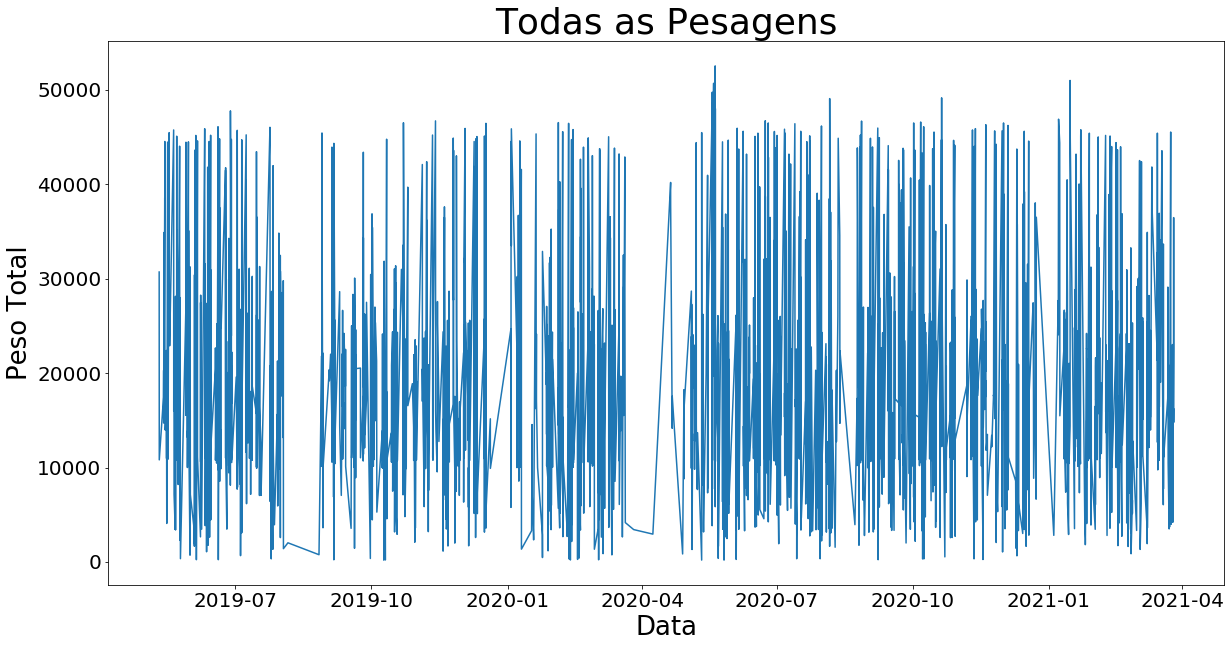

In [5]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 20})
plt.plot(weighingTimeSeries.timestamp, weighingTimeSeries.weight)#, 'g')
#plt.legend(['0','1','2','3','4','5','6','7'])
plt.xlabel('Data', fontsize=26)
plt.ylabel('Peso Total', fontsize=26)
plt.title('Todas as Pesagens', fontsize=36)

Text(0.5, 1.0, 'Todas as Medições')

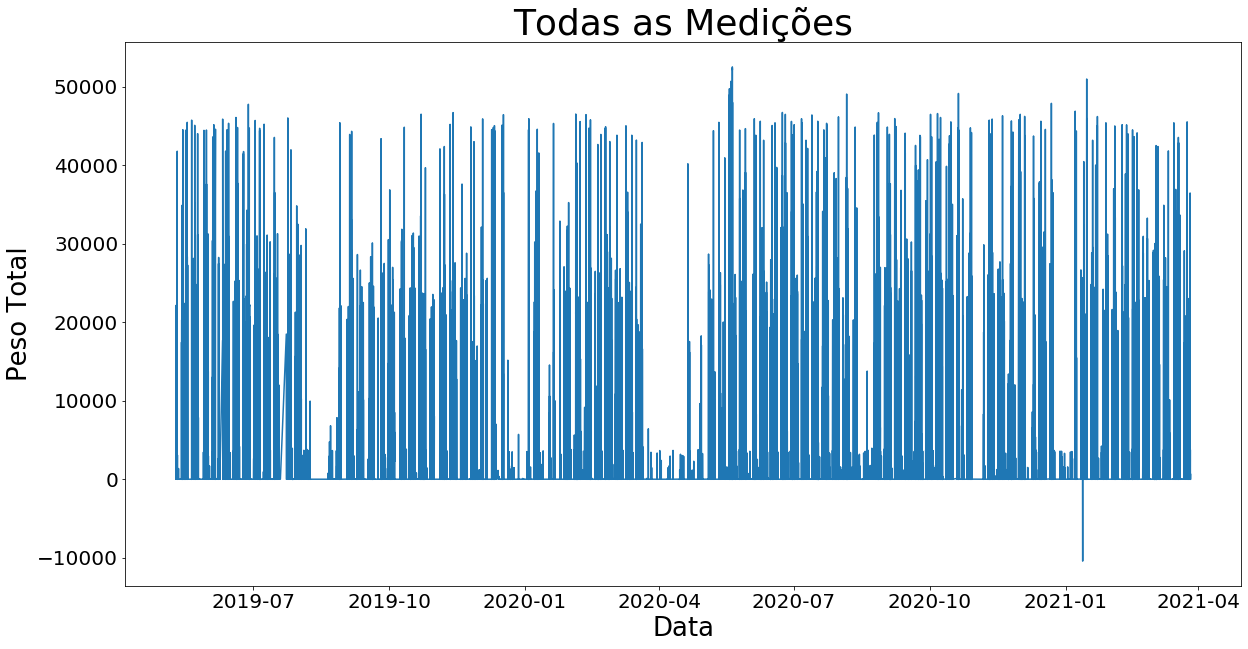

In [6]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 20})
plt.plot(SegmentedData.timestamp, SegmentedData.scaleGross)#, 'g')
#plt.legend(['0','1','2','3','4','5','6','7'])
plt.xlabel('Data', fontsize=26)
plt.ylabel('Peso Total', fontsize=26)
plt.title('Todas as Medições', fontsize=36)

In [7]:
weighingTimeSeries.set_index('timestamp')

,weight
timestamp,
2019-05-10 11:15:54,30700.0
2019-05-10 11:21:18,22950.0
2019-05-10 11:59:39,12560.0
2019-05-10 12:02:54,25510.0
2019-05-10 12:47:30,10810.0
...,...
2021-03-25 17:29:05,4200.0
2021-03-26 07:28:13,22640.0
2021-03-26 08:06:24,36460.0


In [8]:
len(SegmentedData)

658139

In [9]:
weighingTimeSeries

,timestamp,weight
0,2019-05-10 11:15:54,30700.0
1,2019-05-10 11:21:18,22950.0
2,2019-05-10 11:59:39,12560.0
3,2019-05-10 12:02:54,25510.0
4,2019-05-10 12:47:30,10810.0
...,...,...
2893,2021-03-25 17:29:05,4200.0
2894,2021-03-26 07:28:13,22640.0
2895,2021-03-26 08:06:24,36460.0
2896,2021-03-26 08:46:26,14780.0


C:\Users\Leonardo\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Leonardo\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been pr

                             ARIMA Model Results                              
Dep. Variable:               D.weight   No. Observations:                 2897
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -31289.004
Method:                       css-mle   S.D. of innovations          11865.621
Date:                Sat, 10 Jul 2021   AIC                          62592.009
Time:                        18:20:05   BIC                          62633.809
Sample:                             1   HQIC                         62607.071
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.8699     69.338     -0.027      0.978    -137.769     134.029
ar.L1.D.weight    -0.7619      0.018    -41.415      0.000      -0.798      -0.726
ar.L2.D.weight    -0.5783      0.023

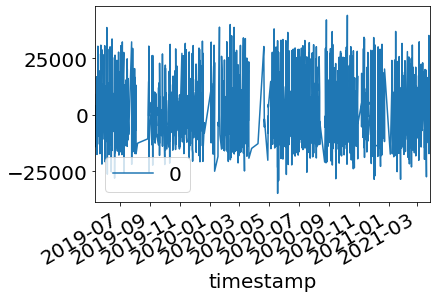

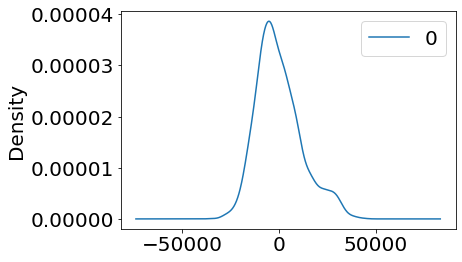

                  0
count   2897.000000
mean      -3.639171
std    11868.655496
min   -34692.003607
25%    -8372.369859
50%    -1842.589123
75%     6538.280950
max    44037.311671


In [10]:
# fit an ARIMA model and plot residual errors
import statsmodels.api as sm
ARIMA=sm.tsa.ARIMA
# load dataset
series = weighingTimeSeries.set_index('timestamp')
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

### Number of Weighings by day

In [11]:
weighingTimeSeries

,timestamp,weight
0,2019-05-10 11:15:54,30700.0
1,2019-05-10 11:21:18,22950.0
2,2019-05-10 11:59:39,12560.0
3,2019-05-10 12:02:54,25510.0
4,2019-05-10 12:47:30,10810.0
...,...,...
2893,2021-03-25 17:29:05,4200.0
2894,2021-03-26 07:28:13,22640.0
2895,2021-03-26 08:06:24,36460.0
2896,2021-03-26 08:46:26,14780.0


In [12]:
weighingByDay = (pd.to_datetime(weighingTimeSeries['timestamp'])
       .dt.floor('d')
       .value_counts()
       .rename_axis('date')
       .reset_index(name='count'))
weighingByDay=weighingByDay.sort_values(by=['date'])
weighingByDay.reset_index(drop=True,inplace=True)
weighingByDay

,date,count
0,2019-05-10,5
1,2019-05-13,7
2,2019-05-14,7
3,2019-05-15,7
4,2019-05-16,11
...,...,...
394,2021-03-22,4
395,2021-03-23,8
396,2021-03-24,8
397,2021-03-25,4


In [13]:
weighingByDay['count']

0       5
1       7
2       7
3       7
4      11
       ..
394     4
395     8
396     8
397     4
398     4
Name: count, Length: 399, dtype: int64

Text(0.5, 1.0, 'Pesagens por Dia')

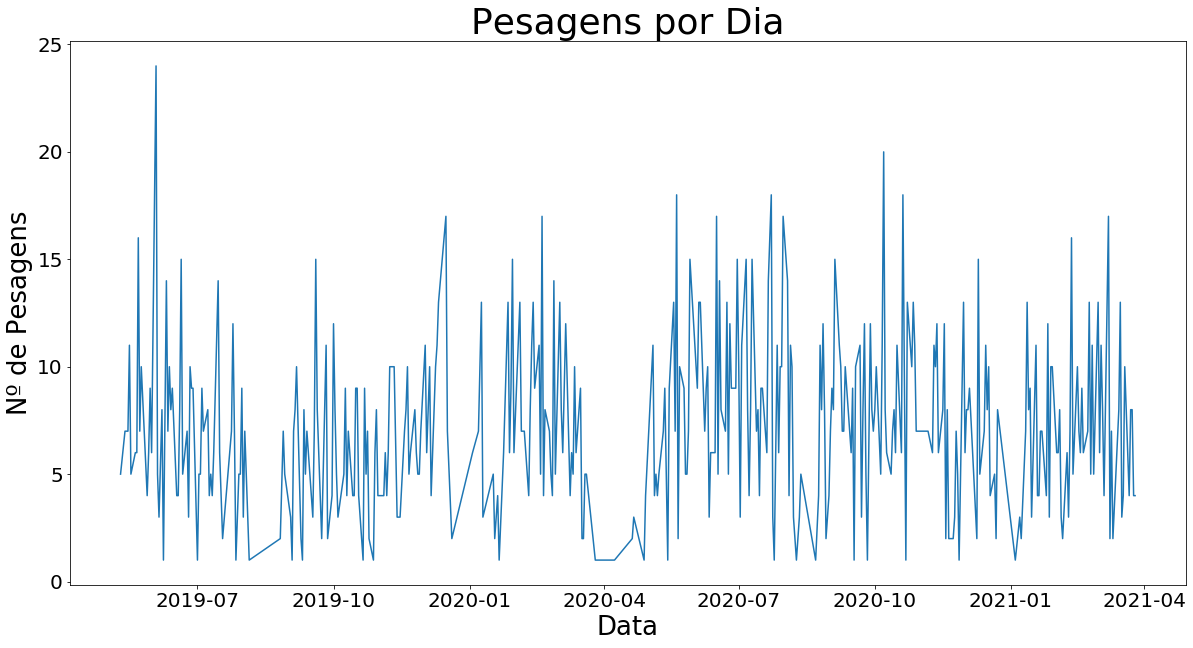

In [14]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 20})
plt.plot(weighingByDay.date, weighingByDay['count'].values)#, 'g')
#plt.legend(['0','1','2','3','4','5','6','7'])
plt.xlabel('Data', fontsize=26)
plt.ylabel('Nº de Pesagens', fontsize=26)
plt.title('Pesagens por Dia', fontsize=36)

In [15]:
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
adf_test=ADFTest(alpha=0.05)
adf_test.should_diff(weighingByDay['count'])

(0.01, False)

In [16]:
from pmdarima.arima.utils import ndiffs
# Estimate the number of differences using an ADF test:
n_adf = ndiffs(weighingByDay['count'], test='adf')  # -> 0

In [17]:
n_adf

0

In [18]:
series.sort_index(inplace= True)

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = weighingByDay.set_index('date')
result = seasonal_decompose(series, model='additive')
print(result.trend)
print('seasonality: \n', result.seasonal)
print(result.resid)
print(result.observed)

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

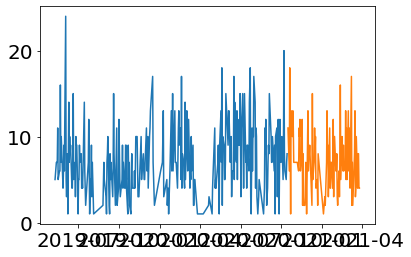

In [20]:
teste=weighingByDay.set_index('date')
train=teste[:300]
test=teste[-98:]
plt.plot(train)
plt.plot(test)

In [21]:
arima_model=auto_arima(train, start_p=0,d=0,start_q=0,
                       max_p=5,max_d=2,max_q=5,start_P=0,
                      D=0,start_Q=0,max_P=5,max_D=2,
                      max_Q=5,m=60,seasonal=True,
                      error_action='warn',trace=True,
                      supress_warnings=True,stepwise=True,
                      random_state=0,n_fits=100)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[60] intercept   : AIC=1687.295, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[60] intercept   : AIC=1683.159, Time=7.00 sec
 ARIMA(0,0,1)(0,0,1)[60] intercept   : AIC=1683.955, Time=2.60 sec
 ARIMA(0,0,0)(0,0,0)[60]             : AIC=2123.624, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[60] intercept   : AIC=1684.986, Time=0.07 sec
 ARIMA(1,0,0)(2,0,0)[60] intercept   : AIC=1682.102, Time=28.39 sec
 ARIMA(1,0,0)(3,0,0)[60] intercept   : AIC=1683.466, Time=64.62 sec
 ARIMA(1,0,0)(2,0,1)[60] intercept   : AIC=inf, Time=90.08 sec
 ARIMA(1,0,0)(1,0,1)[60] intercept   : AIC=1683.683, Time=10.92 sec
 ARIMA(1,0,0)(3,0,1)[60] intercept   : AIC=inf, Time=185.04 sec
 ARIMA(0,0,0)(2,0,0)[60] intercept   : AIC=1683.846, Time=19.41 sec
 ARIMA(2,0,0)(2,0,0)[60] intercept   : AIC=1684.038, Time=35.62 sec
 ARIMA(1,0,1)(2,0,0)[60] intercept   : AIC=1678.842, Time=93.02 sec
 ARIMA(1,0,1)(1,0,0)[60] intercept   : AIC=1680.801, Time=13.11 sec
 ARIMA(1,0,1)(3,0,0

KeyboardInterrupt: 

In [22]:
prediction=pd.DataFrame(arima_model.predict(n_periods=98),index=test.index)
prediction.columns=['predicted_weighings']
prediction

NameError: name 'arima_model' is not defined

NameError: name 'prediction' is not defined

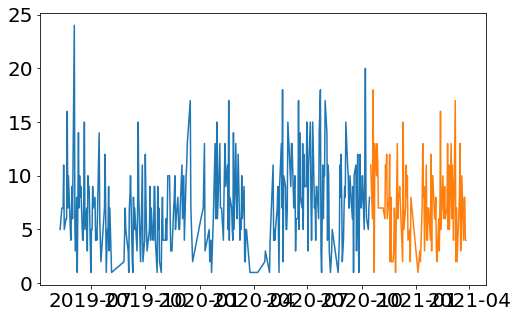

In [23]:
plt.figure(figsize=(8,5))
plt.plot(train,label='Training')
plt.plot(test,label='Test')
plt.plot(prediction,label='Predicted')
plt.legend(loc='Left corner')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
test['predicted_weighings']=prediction
r2_score(test['count'],test['predicted_weighings'])

C:\Users\Leonardo\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Leonardo\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been pr

                             ARIMA Model Results                              
Dep. Variable:                D.count   No. Observations:                  398
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1131.004
Method:                       css-mle   S.D. of innovations              4.143
Date:                Fri, 09 Jul 2021   AIC                           2276.008
Time:                        14:57:56   BIC                           2303.913
Sample:                             1   HQIC                          2287.061
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0031      0.060     -0.052      0.959      -0.121       0.114
ar.L1.D.count    -0.8473      0.050    -17.025      0.000      -0.945      -0.750
ar.L2.D.count    -0.6530      0.063    -

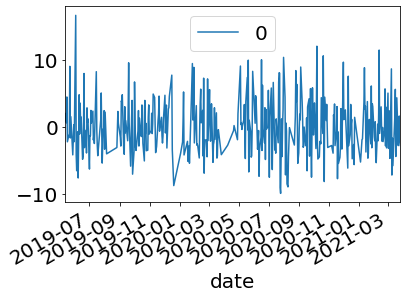

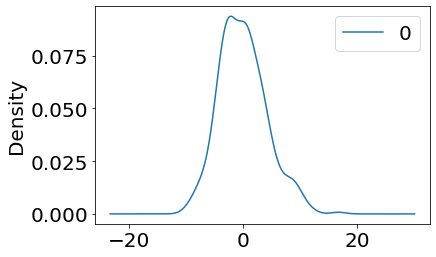

                0
count  398.000000
mean     0.009937
std      4.149537
min     -9.922360
25%     -2.848465
50%     -0.321940
75%      2.629854
max     16.678845


In [24]:
# fit an ARIMA model and plot residual errors
import statsmodels.api as sm
ARIMA=sm.tsa.ARIMA
# load dataset
series = weighingByDay.set_index('date')
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

### Weight Sum By Day

In [25]:
#Calcular o peso registado por dia
aux=cp.deepcopy(weighingTimeSeries)
aux['date'] = (pd.to_datetime(weighingTimeSeries['timestamp']).dt.floor('d'))
aux=aux[['date','weight']]

In [26]:
aux

,date,weight
0,2019-05-10,30700.0
1,2019-05-10,22950.0
2,2019-05-10,12560.0
3,2019-05-10,25510.0
4,2019-05-10,10810.0
...,...,...
2893,2021-03-25,4200.0
2894,2021-03-26,22640.0
2895,2021-03-26,36460.0
2896,2021-03-26,14780.0


In [27]:
weighingByDay['weight']=aux.groupby(['date']).sum().rename_axis('date').reset_index()['weight']
weighingByDay

,date,count,weight
0,2019-05-10,5,102530.0
1,2019-05-13,7,146780.0
2,2019-05-14,7,178340.0
3,2019-05-15,7,108030.0
4,2019-05-16,11,230060.0
...,...,...,...
394,2021-03-22,4,74230.0
395,2021-03-23,8,83590.0
396,2021-03-24,8,146700.0
397,2021-03-25,4,48910.0


Text(0.5, 1.0, 'Total de Peso Registado por Dia')

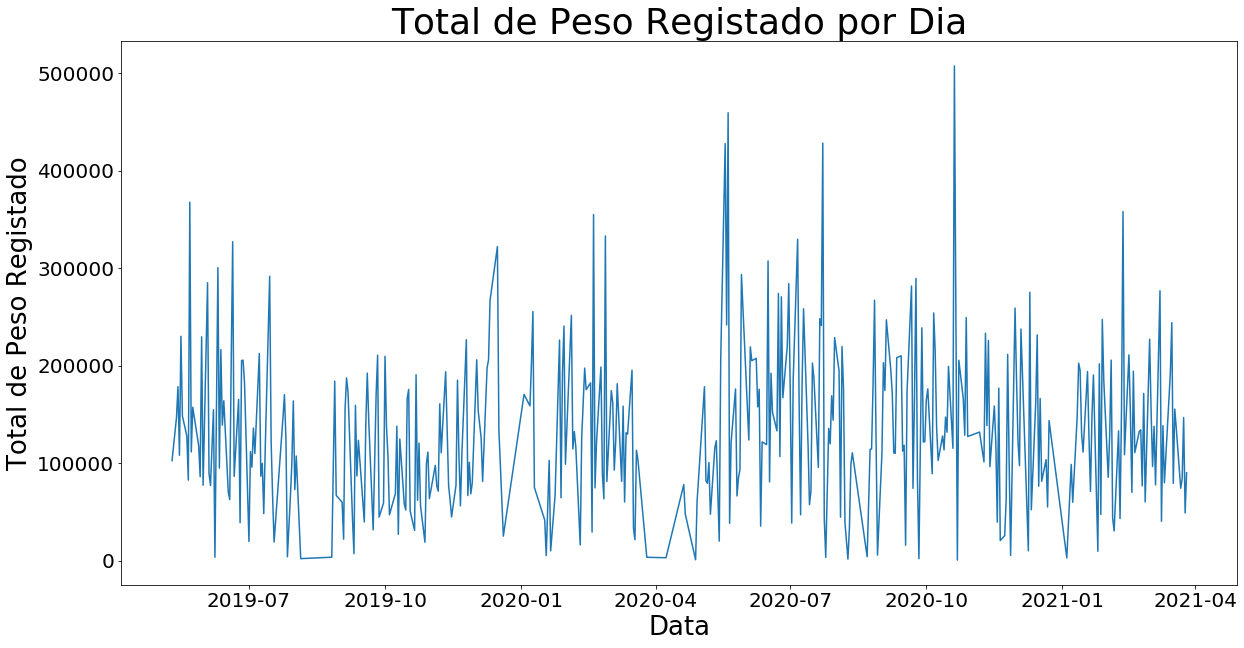

In [28]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 20})
plt.plot(weighingByDay.date, weighingByDay['weight'].values)#, 'g')
#plt.legend(['0','1','2','3','4','5','6','7'])
plt.xlabel('Data', fontsize=26)
plt.ylabel('Total de Peso Registado', fontsize=26)
plt.title('Total de Peso Registado por Dia', fontsize=36)

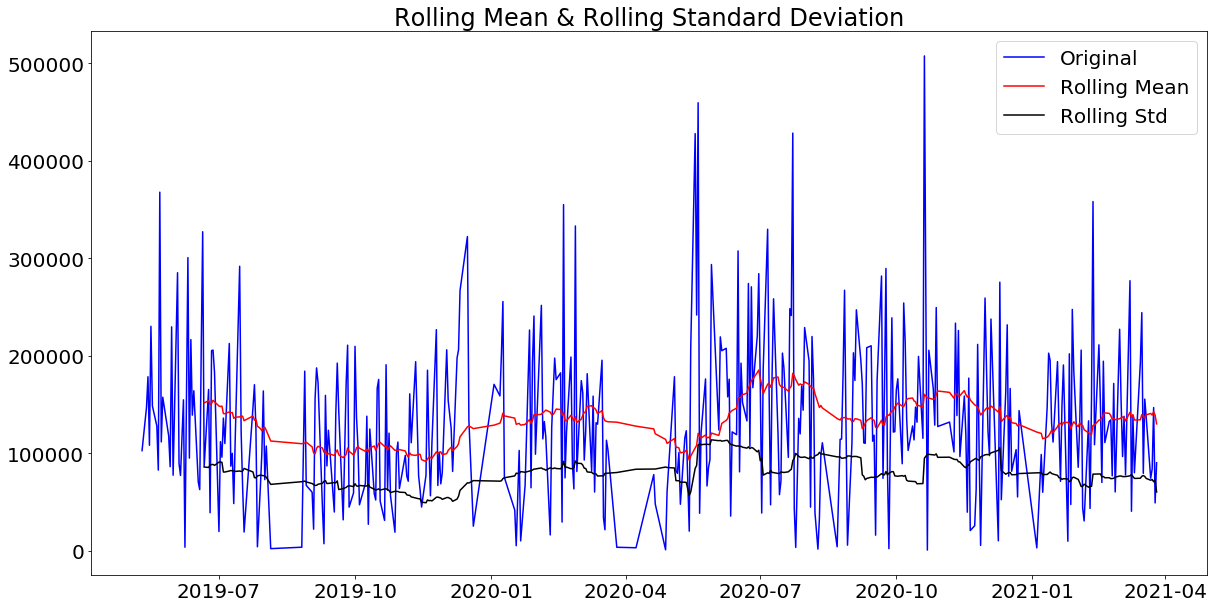

In [29]:
rolling_mean = weighingByDay[['date','weight']].rolling(window = 30).mean()
rolling_std = weighingByDay[['date','weight']].rolling(window = 30).std()
plt.figure(figsize=(20,10))
plt.plot(weighingByDay.date, weighingByDay['weight'].values, color = 'blue', label = 'Original')
plt.plot(weighingByDay.date,rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(weighingByDay.date,rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

### Weighings By Month

In [30]:
weighingByDay

,date,count,weight
0,2019-05-10,5,102530.0
1,2019-05-13,7,146780.0
2,2019-05-14,7,178340.0
3,2019-05-15,7,108030.0
4,2019-05-16,11,230060.0
...,...,...,...
394,2021-03-22,4,74230.0
395,2021-03-23,8,83590.0
396,2021-03-24,8,146700.0
397,2021-03-25,4,48910.0


In [31]:
weighingByMonth=weighingByDay[['date','count']].groupby(weighingByDay.date.dt.to_period("M")).agg('count')
weighingByMonth=weighingByMonth.drop(columns=['date']).rename_axis('date').reset_index()
weighingByMonth['date'] = weighingByMonth['date'].astype(str)
weighingByMonth['date'] = pd.to_datetime(weighingByMonth['date'])
weighingByMonth

,date,count
0,2019-05-01,15
1,2019-06-01,20
2,2019-07-01,21
3,2019-08-01,6
4,2019-09-01,19
5,2019-10-01,22
6,2019-11-01,19
7,2019-12-01,10
8,2020-01-01,15
9,2020-02-01,19


Text(0.5, 1.0, 'Weighings by Month')

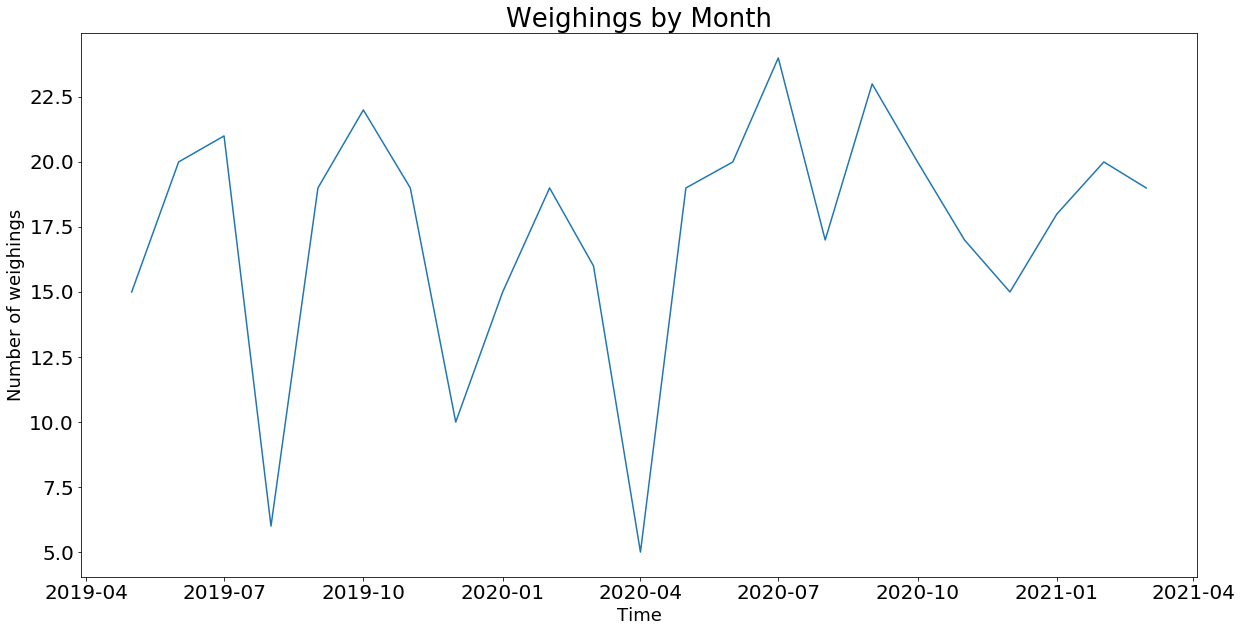

In [32]:
plt.figure(figsize=(20,10))
plt.plot(weighingByMonth.date, weighingByMonth['count'].values)#, 'g')
#plt.legend(['0','1','2','3','4','5','6','7'])
plt.xlabel('Time', fontsize=18)
plt.ylabel('Number of weighings', fontsize=18)
plt.title('Weighings by Month', fontsize=26)

### Weight SUM By Month

In [33]:
weighingByDay

,date,count,weight
0,2019-05-10,5,102530.0
1,2019-05-13,7,146780.0
2,2019-05-14,7,178340.0
3,2019-05-15,7,108030.0
4,2019-05-16,11,230060.0
...,...,...,...
394,2021-03-22,4,74230.0
395,2021-03-23,8,83590.0
396,2021-03-24,8,146700.0
397,2021-03-25,4,48910.0


In [34]:
aux=weighingByDay[['weight']].groupby(weighingByDay.date.dt.to_period("M")).sum()
weighingByMonth['weight']=aux.rename_axis('date').reset_index()['weight']
weighingByMonth

,date,count,weight
0,2019-05-01,15,2271640.0
1,2019-06-01,20,3072220.0
2,2019-07-01,21,2306370.0
3,2019-08-01,6,436580.0
4,2019-09-01,19,2049450.0
5,2019-10-01,22,2115910.0
6,2019-11-01,19,1972290.0
7,2019-12-01,10,1717660.0
8,2020-01-01,15,1911510.0
9,2020-02-01,19,2818880.0


Text(0.5, 1.0, 'Sum of weighings by Month')

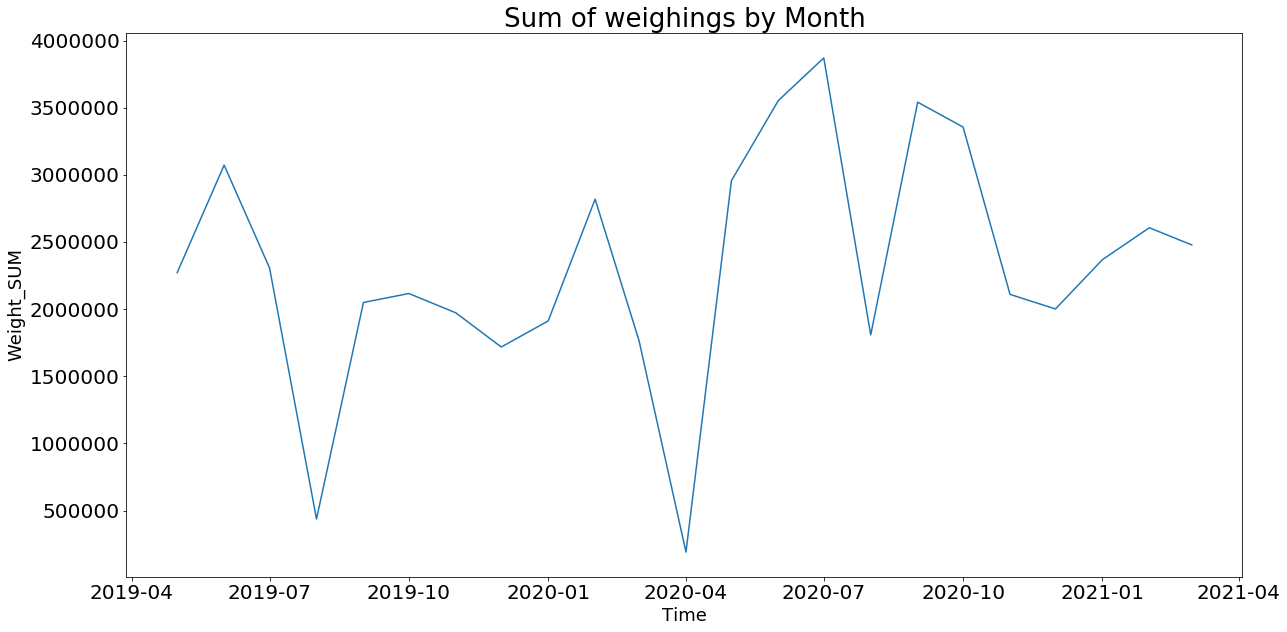

In [35]:
plt.figure(figsize=(20,10))
plt.plot(weighingByMonth.date, weighingByMonth['weight'].values)#, 'g')
#plt.legend(['0','1','2','3','4','5','6','7'])
plt.xlabel('Time', fontsize=18)
plt.ylabel('Weight_SUM', fontsize=18)
plt.title('Sum of weighings by Month', fontsize=26)

In [36]:
rolling_mean = weighingByMonth[['date','weight']].rolling(window = 12).mean()
rolling_std = weighingByMonth[['date','weight']].rolling(window = 12).std()

In [37]:
rolling_mean

,weight
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


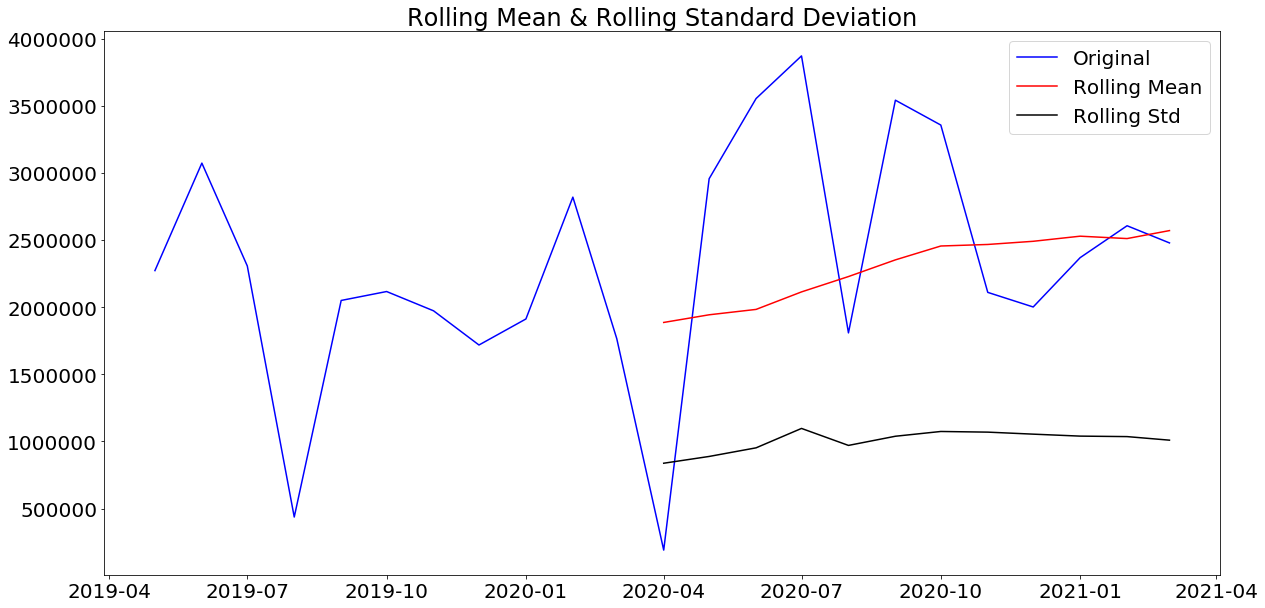

In [38]:
plt.figure(figsize=(20,10))
plt.plot(weighingByMonth.date, weighingByMonth['weight'].values, color = 'blue', label = 'Original')
plt.plot(weighingByMonth.date,rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(weighingByMonth.date,rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

# Weighings by week

In [39]:
weighingByDay

,date,count,weight
0,2019-05-10,5,102530.0
1,2019-05-13,7,146780.0
2,2019-05-14,7,178340.0
3,2019-05-15,7,108030.0
4,2019-05-16,11,230060.0
...,...,...,...
394,2021-03-22,4,74230.0
395,2021-03-23,8,83590.0
396,2021-03-24,8,146700.0
397,2021-03-25,4,48910.0


In [40]:
df1 = weighingByDay.groupby(pd.Grouper(freq='W', key='date'))['count'].sum()
df1=df1.reset_index()
df1

,date,count
0,2019-05-12,5
1,2019-05-19,37
2,2019-05-26,45
3,2019-06-02,25
4,2019-06-09,41
...,...,...
94,2021-02-28,41
95,2021-03-07,42
96,2021-03-14,28
97,2021-03-21,38


Text(0.5, 1.0, 'Pesagens por Semana')

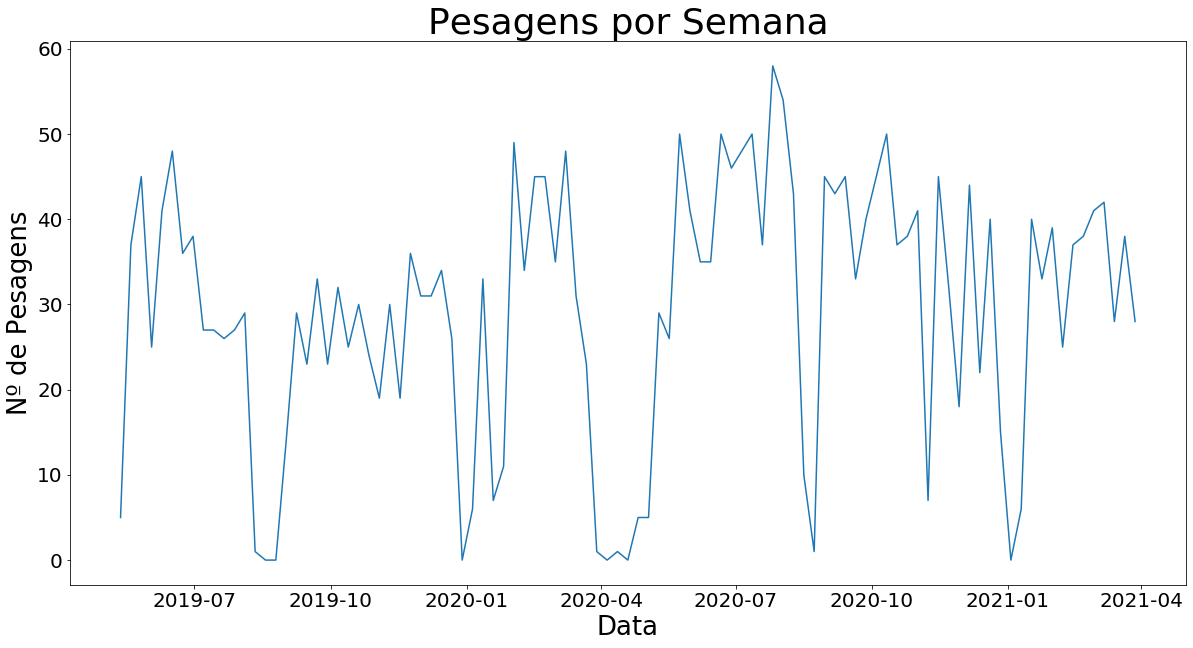

In [41]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 20})
plt.plot(df1.date, df1['count'].values)#, 'g')
#plt.legend(['0','1','2','3','4','5','6','7'])
plt.xlabel('Data', fontsize=26)
plt.ylabel('Nº de Pesagens', fontsize=26)
plt.title('Pesagens por Semana', fontsize=36)

In [43]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = df1

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.values); axes[0, 0].set_title('Original Series')
plot_acf(df.values, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.values.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.values.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

TypeError: float() argument must be a string or a number, not 'Timestamp'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000023BAA7A48B8> (for post_execute):


ValueError: view limit minimum -36893.85 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36893.85 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [48]:
df['count'].values

array([ 5, 37, 45, 25, 41, 48, 36, 38, 27, 27, 26, 27, 29,  1,  0,  0, 14,
       29, 23, 33, 23, 32, 25, 30, 24, 19, 30, 19, 36, 31, 31, 34, 26,  0,
        6, 33,  7, 11, 49, 34, 45, 45, 35, 48, 31, 23,  1,  0,  1,  0,  5,
        5, 29, 26, 50, 41, 35, 35, 50, 46, 48, 50, 37, 58, 54, 43, 10,  1,
       45, 43, 45, 33, 40, 45, 50, 37, 38, 41,  7, 45, 32, 18, 44, 22, 40,
       15,  0,  6, 40, 33, 39, 25, 37, 38, 41, 42, 28, 38, 28],
      dtype=int64)

## Applying ARIMA (p,d,q) p->number of autoregressive parameters,
## d->number of moving average parameters, q-> number of differentying parameters

### Finding if the series is stationary

In [52]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df['count'].dropna().values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.749012
p-value: 0.000001


### Weekly series is Stationary! p_value of ADF is 0.000001
### q=0

### Finding if the series has significant AR parameters

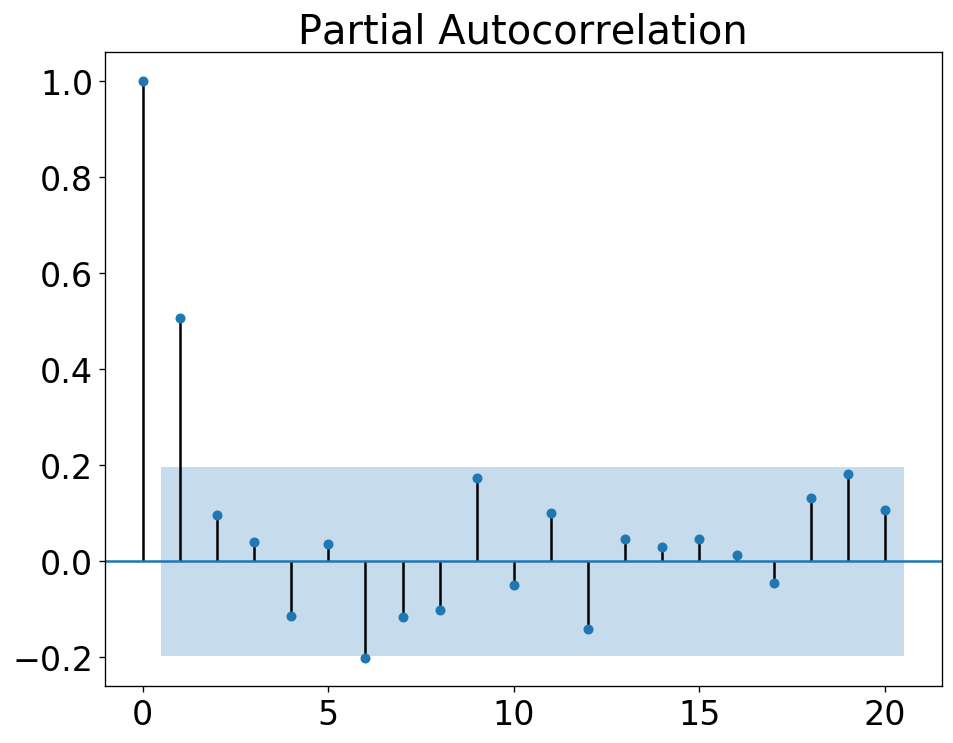

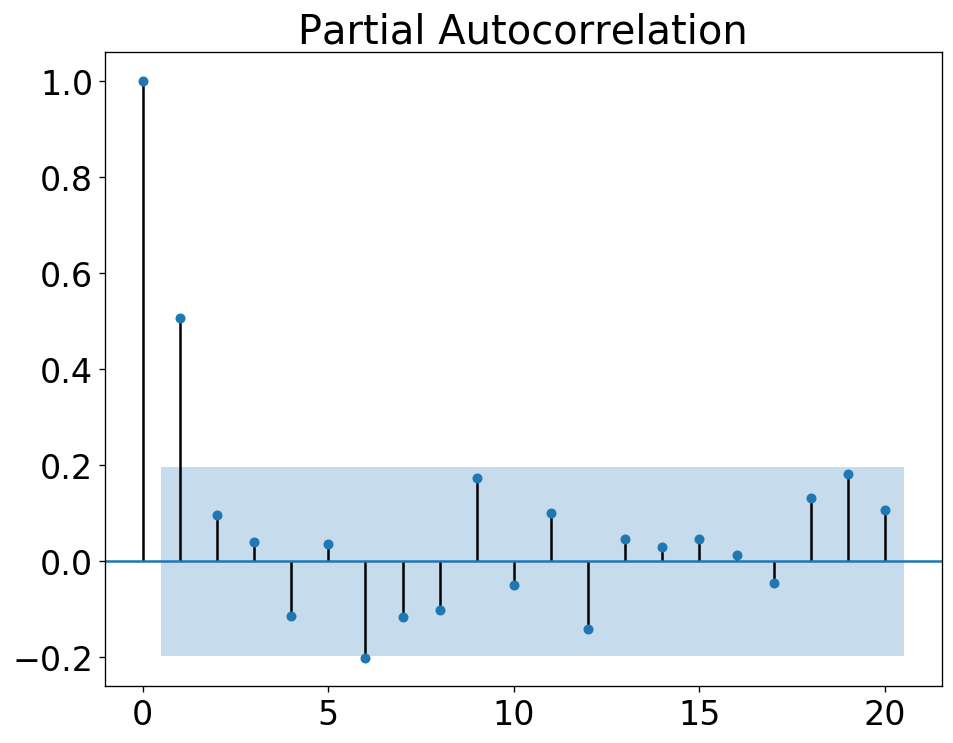

In [59]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['count'].values)

### The 1st lag is about 0.5, way above the significance level. To be conservative only this lag will considered
### p=1

### Finding if the series has significant MA parameters

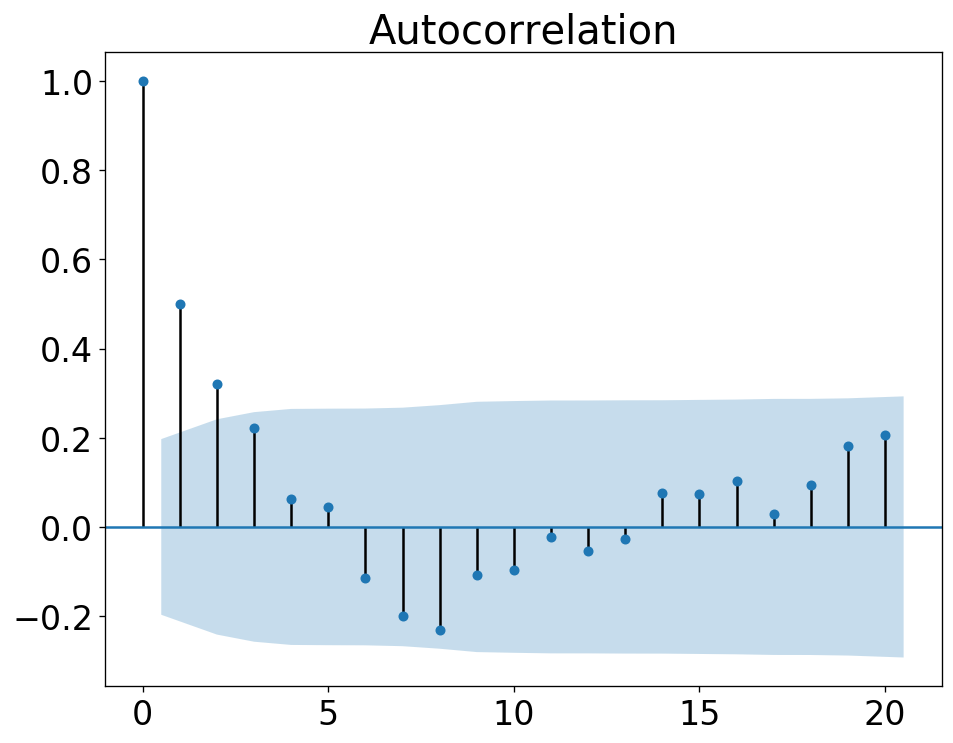

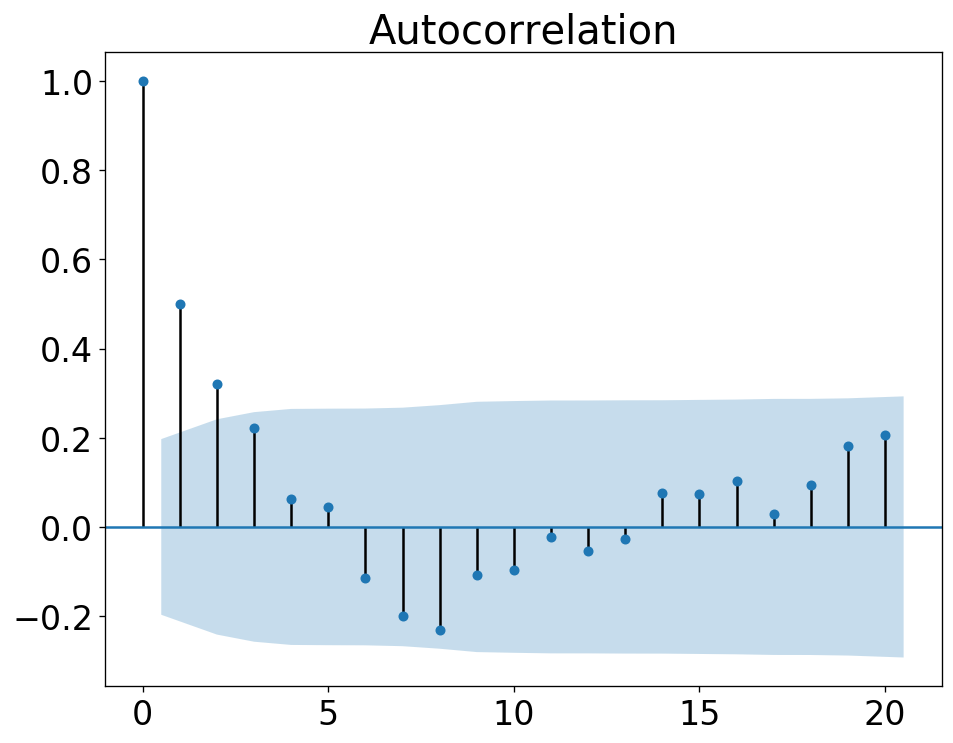

In [49]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['count'].values)

### Only the 1st and 2nd lag are above the significance level.
### d=2

## Fitting the ARIMA model

C:\Users\Leonardo\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Leonardo\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information

                             ARIMA Model Results                              
Dep. Variable:               D2.count   No. Observations:                   97
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -426.999
Method:                       css-mle   S.D. of innovations             19.707
Date:                Fri, 09 Jul 2021   AIC                            859.999
Time:                        15:53:26   BIC                            867.723
Sample:                    05-26-2019   HQIC                           863.122
                         - 03-28-2021                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2680      1.269     -0.211      0.833      -2.756       2.220
ar.L1.D2.count    -0.5826      0.082     -7.080      0.000      -0.744      -0.421
                                    

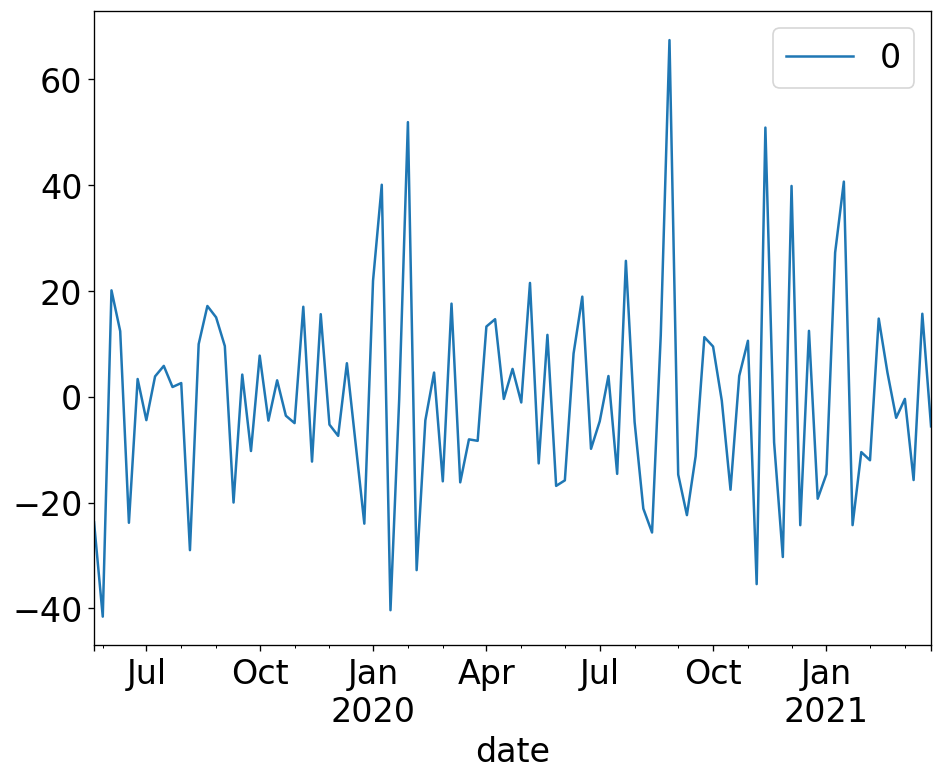

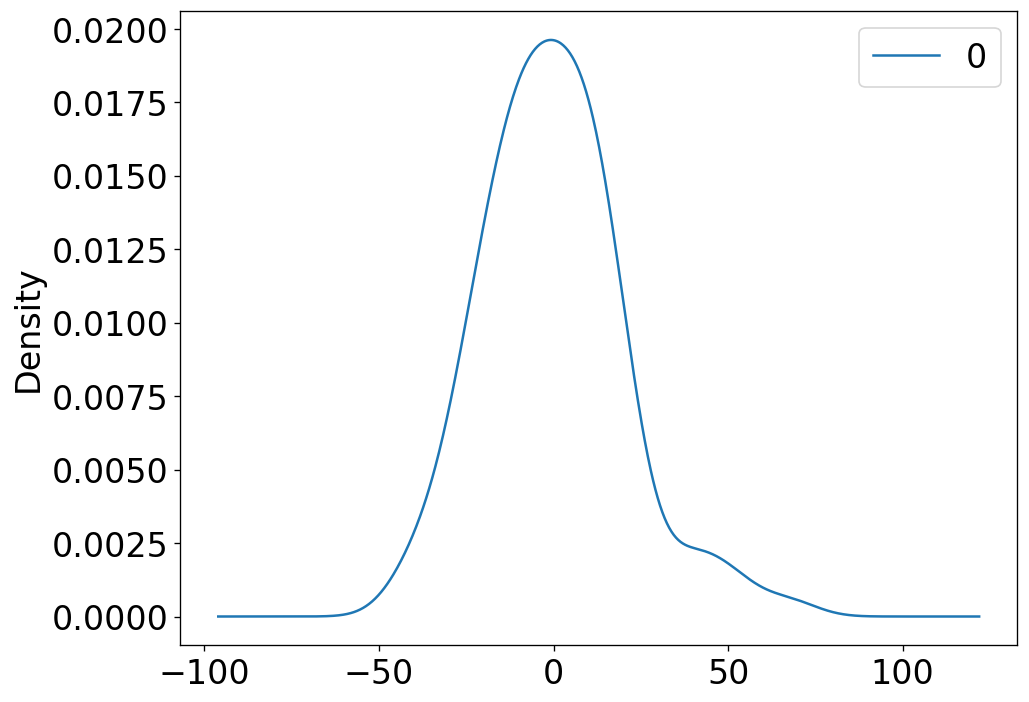

               0
count  97.000000
mean   -0.142530
std    19.859179
min   -41.557466
25%   -14.575802
50%    -0.740941
75%    11.607672
max    67.405863


In [69]:
# fit an ARIMA model and plot residual errors
import statsmodels.api as sm
ARIMA=sm.tsa.ARIMA
# load dataset
series = df1.set_index('date')
# fit model
model = ARIMA(series, order=(1,2,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [73]:
df1.iloc[:62,:]

,date,count
0,2019-05-12,5
1,2019-05-19,37
2,2019-05-26,45
3,2019-06-02,25
4,2019-06-09,41
...,...,...
57,2020-06-14,35
58,2020-06-21,50
59,2020-06-28,46
60,2020-07-05,48


In [72]:
df1.iloc[-37:,:]

,date,count
62,2020-07-19,37
63,2020-07-26,58
64,2020-08-02,54
65,2020-08-09,43
66,2020-08-16,10
67,2020-08-23,1
68,2020-08-30,45
69,2020-09-06,43
70,2020-09-13,45
71,2020-09-20,33


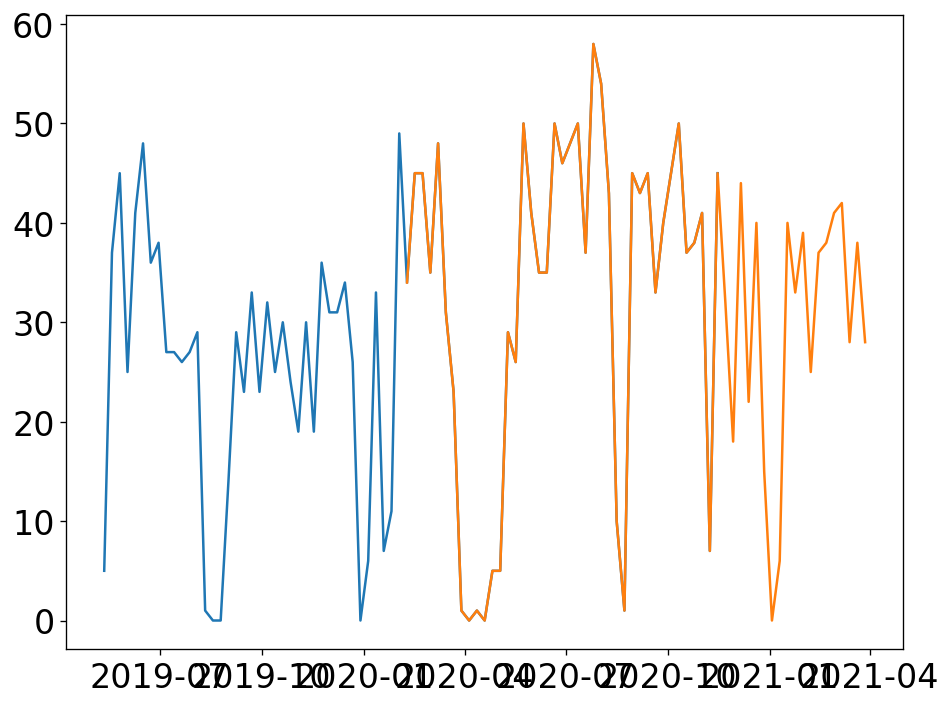

In [114]:
teste=df1.set_index('date')
train=teste[:80]
test=teste[-60:]
plt.plot(train)
plt.plot(test)

In [115]:
arima_model=auto_arima(train, start_p=1,d=1,start_q=0,
                       max_p=5,max_d=1,max_q=0,start_P=1,
                      D=1,start_Q=0,max_P=5,max_D=1,
                      max_Q=0,m=40,seasonal=True,
                      error_action='warn',trace=True,
                      supress_warnings=True,stepwise=True,
                      random_state=0,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(1,1,0)(1,1,0)[40]             : AIC=inf, Time=8.33 sec
 ARIMA(0,1,0)(0,1,0)[40]             : AIC=359.859, Time=0.11 sec
 ARIMA(0,1,0)(1,1,0)[40]             : AIC=inf, Time=5.11 sec
 ARIMA(1,1,0)(0,1,0)[40]             : AIC=360.084, Time=0.16 sec
 ARIMA(0,1,0)(0,1,0)[40] intercept   : AIC=361.821, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,1,0)[40]          
Total fit time: 13.844 seconds


In [117]:
prediction=pd.DataFrame(arima_model.predict(n_periods=60),index=test.index)
prediction.columns=['predicted_weighings']
prediction

,predicted_weighings
date,
2020-02-09,56.0
2020-02-16,56.0
2020-02-23,46.0
2020-03-01,59.0
2020-03-08,42.0
2020-03-15,34.0
2020-03-22,12.0
2020-03-29,11.0
2020-04-05,12.0


C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Unrecognized location 'Left corner'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  """


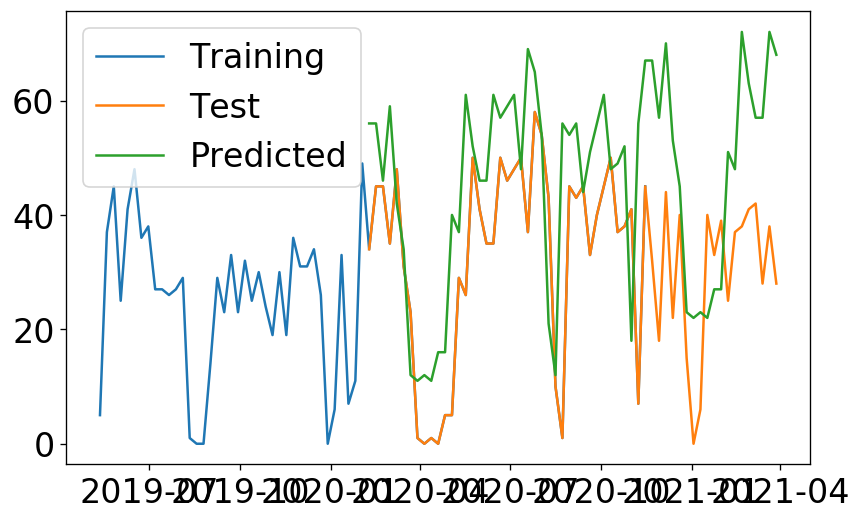

In [118]:
plt.figure(figsize=(8,5))
plt.plot(train,label='Training')
plt.plot(test,label='Test')
plt.plot(prediction,label='Predicted')
plt.legend(loc='Left corner')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
test['predicted_weighings']=prediction
r2_score(test['count'],test['predicted_weighings'])

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 20})
plt.plot(df1.date, df1['count'].values)#, 'g')
#plt.legend(['0','1','2','3','4','5','6','7'])
plt.xlabel('Data', fontsize=26)
plt.ylabel('Nº de Pesagens', fontsize=26)
plt.title('Pesagens por Semana', fontsize=36)